<h1> Digital Device vs. Sleep Model </h1>

**Question:** Can we predict my quality of sleep from my device usage?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("fivethirtyeight")
sns.set_context("notebook")

In [2]:
import json

data = json.load(open('fb_data/sleep/sleep-2018-08-30.json', 'r'))
fb_test = pd.json_normalize(data)

In [3]:
fb_test

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,...,levels.summary.wake.count,levels.summary.wake.minutes,levels.summary.wake.thirtyDayAvgMinutes,levels.summary.light.count,levels.summary.light.minutes,levels.summary.light.thirtyDayAvgMinutes,levels.summary.rem.count,levels.summary.rem.minutes,levels.summary.rem.thirtyDayAvgMinutes,levels.shortData
0,19672669150,2018-09-29,2018-09-29T15:09:00.000,2018-09-29T17:42:30.000,9180000,0,150,3,0,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19670111081,2018-09-29,2018-09-29T01:16:00.000,2018-09-29T07:58:00.000,24120000,0,365,37,0,402,...,21.0,37.0,50.0,21.0,203.0,217.0,5.0,100.0,89.0,"[{'dateTime': '2018-09-29T01:16:00.000', 'leve..."
2,19660398097,2018-09-28,2018-09-28T01:27:00.000,2018-09-28T07:37:30.000,22200000,0,309,61,0,370,...,22.0,61.0,49.0,24.0,180.0,219.0,6.0,57.0,90.0,"[{'dateTime': '2018-09-28T01:27:00.000', 'leve..."
3,19649903211,2018-09-27,2018-09-26T22:52:00.000,2018-09-27T08:46:30.000,35640000,0,541,53,0,594,...,40.0,53.0,49.0,36.0,259.0,217.0,14.0,166.0,87.0,"[{'dateTime': '2018-09-26T23:23:30.000', 'leve..."
4,19639676952,2018-09-26,2018-09-26T00:41:00.000,2018-09-26T07:36:30.000,24900000,0,376,39,0,415,...,25.0,39.0,50.0,20.0,141.0,220.0,12.0,108.0,87.0,"[{'dateTime': '2018-09-26T00:41:00.000', 'leve..."
5,19628671579,2018-09-25,2018-09-25T02:59:00.000,2018-09-25T10:16:00.000,26220000,0,399,38,0,437,...,32.0,38.0,50.0,34.0,245.0,219.0,5.0,104.0,86.0,"[{'dateTime': '2018-09-25T03:34:00.000', 'leve..."
6,19618359907,2018-09-24,2018-09-23T23:12:00.000,2018-09-24T07:08:00.000,28560000,0,410,66,0,476,...,18.0,66.0,49.0,21.0,257.0,218.0,6.0,77.0,86.0,"[{'dateTime': '2018-09-24T00:56:30.000', 'leve..."
7,19609729328,2018-09-23,2018-09-23T07:10:00.000,2018-09-23T11:22:30.000,15120000,0,222,30,0,252,...,16.0,30.0,50.0,14.0,136.0,221.0,6.0,43.0,88.0,"[{'dateTime': '2018-09-23T07:58:00.000', 'leve..."
8,19602100197,2018-09-22,2018-09-22T15:55:30.000,2018-09-22T18:26:30.000,9060000,0,139,12,0,151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19599671383,2018-09-22,2018-09-22T00:11:30.000,2018-09-22T09:47:30.000,34560000,0,506,70,0,576,...,43.0,70.0,49.0,40.0,313.0,217.0,12.0,112.0,87.0,"[{'dateTime': '2018-09-22T00:11:30.000', 'leve..."


In [4]:
fb_sleep_scores_original = pd.read_csv('fb_data/sleep/sleep_score.csv', parse_dates=['timestamp'])
fb_sleep_scores_original

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,29939746909,2020-12-04 10:18:30+00:00,89,23,21,45,120,56,0.125326
1,29923709814,2020-12-03 11:47:30+00:00,85,22,22,41,93,58,0.117786
2,29912020406,2020-12-02 10:06:00+00:00,90,25,21,44,172,59,0.122420
3,29903132593,2020-12-01 10:05:00+00:00,83,21,22,40,62,61,0.085106
4,29888493443,2020-11-30 07:53:30+00:00,80,21,21,38,76,62,0.116904
...,...,...,...,...,...,...,...,...,...
398,23655204951,2019-08-27 11:26:00+00:00,74,17,19,38,79,53,0.112676
399,23655204950,2019-08-26 13:00:00+00:00,76,21,18,37,40,52,0.124384
400,23655204949,2019-08-25 09:47:00+00:00,82,21,20,41,67,51,0.108025
401,23655204948,2019-08-24 10:12:00+00:00,88,22,21,45,92,50,0.101894


In [5]:
fb_sleep_scores_clean = fb_sleep_scores_original.assign(date=lambda x : x['timestamp'].dt.date)[['date','overall_score']].sort_values('date', ascending=True, ignore_index=True)
fb_sleep_scores_clean

,date,overall_score
0,2019-08-23,82
1,2019-08-24,88
2,2019-08-25,82
3,2019-08-26,76
4,2019-08-27,74
...,...,...
398,2020-11-30,80
399,2020-12-01,83
400,2020-12-02,90
401,2020-12-03,85


In [6]:
rt_all_original = pd.read_csv('rt_data/rt_data_1.csv', parse_dates=['Date'])
rt_all_day = rt_all_original.assign(
    hrs=lambda x : x['Time Spent (seconds)'] / 3600
    ).groupby('Date').agg(np.sum).reindex(
    pd.date_range('2018-01-15T00:00:00', '2020-11-30T23:00:00', freq='H'), fill_value=0
    ).reset_index().assign(
    date=lambda x : x['index'].dt.date
    ).groupby('date', as_index=False).agg(np.sum)[['date', 'hrs']]
rt_all_day

,date,hrs
0,2018-01-15,0.188611
1,2018-01-16,3.250556
2,2018-01-17,4.874722
3,2018-01-18,6.807500
4,2018-01-19,8.258333
...,...,...
1046,2020-11-26,1.420833
1047,2020-11-27,2.791667
1048,2020-11-28,0.000000
1049,2020-11-29,6.931111


In [7]:
rt_all_day[rt_all_day['date'] > pd.to_datetime('2019-08-23')]

,date,hrs
586,2019-08-24,0.000000
587,2019-08-25,0.000000
588,2019-08-26,0.000000
589,2019-08-27,0.000000
590,2019-08-28,0.000000
...,...,...
1046,2020-11-26,1.420833
1047,2020-11-27,2.791667
1048,2020-11-28,0.000000
1049,2020-11-29,6.931111


In [8]:
df = fb_sleep_scores_clean.merge(rt_all_day, how='inner', on='date')
df = df[(df['date'] >= pd.to_datetime('2020-08-01')) & (df['hrs'] > 0)]
df

,date,overall_score,hrs
295,2020-08-01,92,8.763611
296,2020-08-02,76,5.107222
297,2020-08-03,71,6.298889
298,2020-08-04,90,5.695833
299,2020-08-06,88,2.992778
...,...,...,...
392,2020-11-24,90,1.838056
394,2020-11-26,79,1.420833
395,2020-11-27,89,2.791667
397,2020-11-29,82,6.931111


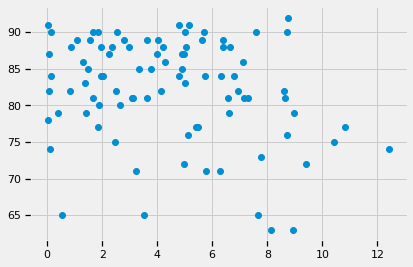

In [9]:
plt.scatter('hrs', 'overall_score', data=df)